In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch

In [4]:
def synthetic_data(w, b, num_examples):
    """
    生成y=Xw+b+噪声
    """
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))


t_w = torch.tensor([2, -3.4])
t_b = 4.2
features, labels = synthetic_data(t_w, t_b, 1000)

In [5]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.3751, 1.3199]) 
label: tensor([0.4765])


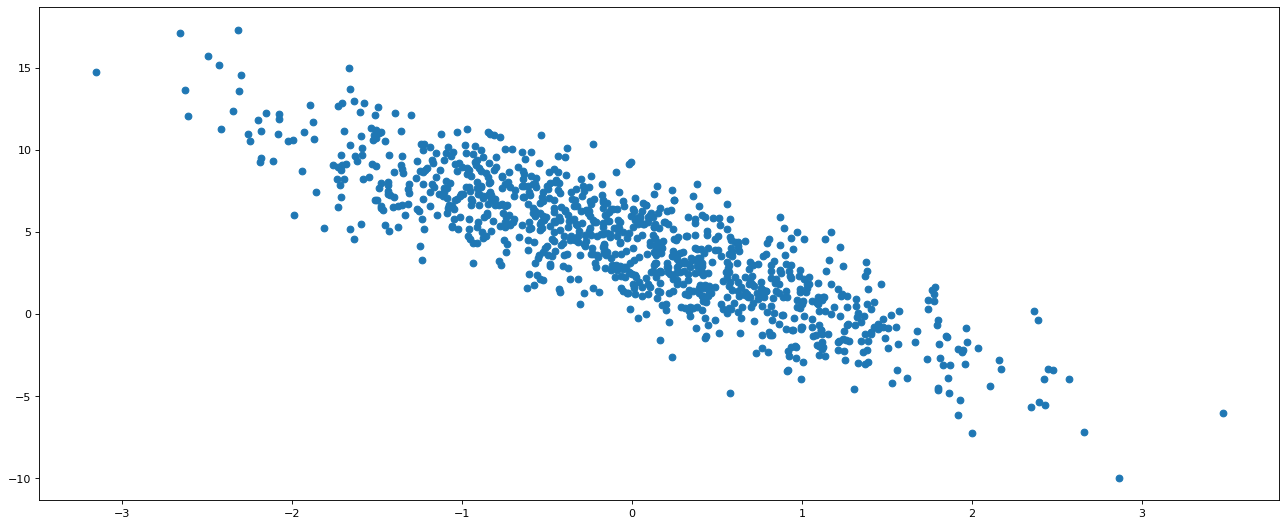

In [6]:
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy())

In [7]:
 def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        b = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[b], labels[b]


batch_size = 10

for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break
# for x,y in data_iter(batch_size,features,labels):
#     print(x,'\n',y)
#     break
# print(data_iter(batch_size,features,labels))
# print(next(data_iter(batch_size,features,labels)))
# print(next(data_iter(batch_size,features,labels)))
g=data_iter(batch_size,features,labels)
print(next(g))
print(next(g))
print('-'*50)
for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)


tensor([[ 0.9258,  0.3685],
        [ 1.3070, -0.7997],
        [ 2.6069, -2.3178],
        [ 0.0886, -1.0955],
        [ 0.7895, -0.3521],
        [-0.0779,  1.1335],
        [ 0.9706, -1.1879],
        [ 0.5039, -1.0265],
        [-0.2650,  1.4076],
        [-0.9985,  0.4351]]) 
 tensor([[ 4.7924],
        [ 9.5266],
        [17.2990],
        [ 8.1029],
        [ 6.9824],
        [ 0.1751],
        [10.1826],
        [ 8.7163],
        [-1.1152],
        [ 0.7122]])
(tensor([[-0.3700, -1.1348],
        [ 1.6458, -1.5762],
        [-0.7515,  2.4296],
        [-0.3928, -0.3469],
        [-1.9743, -0.5240],
        [-1.4781, -0.7382],
        [-0.8110,  1.1154],
        [ 1.9036,  1.0132],
        [ 0.2043, -1.2180],
        [-0.0084,  1.0042]]), tensor([[ 7.3249],
        [12.8473],
        [-5.5689],
        [ 4.5818],
        [ 2.0347],
        [ 3.7489],
        [-1.2293],
        [ 4.5475],
        [ 8.7425],
        [ 0.7704]]))
(tensor([[-1.2579,  1.1163],
        [-1.2687,  0.8

In [8]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [ ]:
def linreg(x,w,b):
    """
    线性回归模型
    """
    return torch.matmul(x,w)+b

In [9]:
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat-y.reshape(y_hat.shape))**2/2
